<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imageClassification.jpeg" alt="Drawing" style="width:1700px;">


# <center> 10. Image classification! </center>


## <span style="color:red"> Outline </span>
1. **Working with an image dataset: mnist**
2. **Image classification**
3. **Image representation for classification**


In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine_Learning_Course/')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [ ]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## <span style="color:red"> 1. Working with an image dataset: mnists </span>

**Load and explore the dataset!**

Mnist has a set of  handwritten digit images with an specific recognition task challenge. Each row has 785 values, the first column corresponds to the digitl label, and the 784 rest values is a vectorized image of $28 \times 28 $. So, we need to form $\mathbf{X}$ matrix and the corresponding $\mathbf{y}$ vector. Each pixel has an intensity of $[ 0 - 255 ]$

In [ ]:
mnist = pd.read_csv("Data/mnist1.5k.csv.gz", header=None).values.astype(float)
print( "dimension de los datos originales", mnist.shape)
X=mnist[:,1:785]
y=mnist[:,0]
print( "dimension de las imagenes y las clases", X.shape, y.shape)
print( "luminosidad maxima", np.max(X))
print( "luminosidad minimo", np.min(X))

dimension de los datos originales (1500, 785)
dimension de las imagenes y las clases (1500, 784) (1500,)
luminosidad maxima 255.0
luminosidad minimo 0.0


Now, we will show some random examples of digits. We use `reshape` to convert a vector of 784 elements in a matrix of size: $(28 \times 28)$ and we interpolate to better visualize the images.

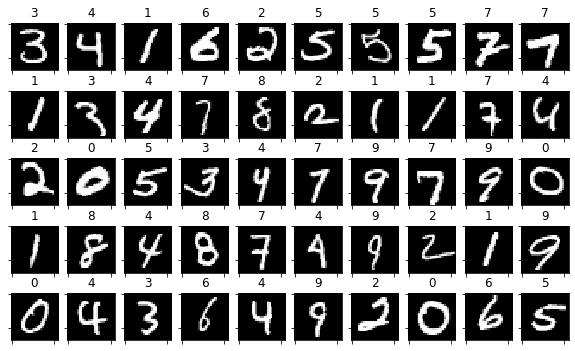

In [ ]:
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm]
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Now we can see the distribution of classes, i.e., how many images we have for each digit

## <span style="color:orange">student</span>:
- How is the distribution class?
- Is it a balanced dataset?

In [ ]:
for i in np.unique(y):
    print( i, np.sum(y==i))

0.0 150
1.0 157
2.0 186
3.0 125
4.0 151
5.0 138
6.0 152
7.0 154
8.0 141
9.0 146


In [ ]:
print( "digito   número de imágenes")
for i in np.unique(y):
    print( "   ",int(i), "   ", np.sum(y==i))

digito   número de imágenes
    0     150
    1     157
    2     186
    3     125
    4     151
    5     138
    6     152
    7     154
    8     141
    9     146


## <span style="color:red"> 2. Image classification </span>

**Training and prediction**

Firstly we use the **Naive Bayes** algorithm for classification. For fast evaluation, we split the dataset on $80\%$ for training and the rest $20 \%$ for test.

## <span style="color:orange">student</span>:
- How is the algorithm performance?
- Is it appropiate for digit classification
- In which digit classes has more mistakes?
- Why?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
test_size = 0.2
#by defautl is 0.25 in test.

d_train, d_test, c_train, c_test = train_test_split(X, y, test_size=test_size)
print( d_train.shape, d_test.shape)
print( c_train.shape, c_test.shape)

g = GaussianNB()
g.fit(d_train, c_train)
print( "acierto en train", g.score(d_train, c_train))
print( "acierto en test ", g.score(d_test, c_test))


(1200, 784) (300, 784)
(1200,) (300,)
acierto en train 0.7066666666666667
acierto en test  0.6333333333333333


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print( "dimensiones train", d_train.shape, c_train.shape)
print( "dimsensions test ", d_test.shape, c_test.shape)

g = SVC(kernel='rbf')
g.fit(d_train, c_train)
print( "acierto en train", g.score(d_train, c_train))
print( "acierto en test ", g.score(d_test, c_test))

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

cm_train=confusion_matrix(c_train, predicciones_train)
cm_test = confusion_matrix(c_test, predicciones_test)
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))

dimensiones train (1200, 784) (1200,)
dimsensions test  (300, 784) (300,)
acierto en train 0.9866666666666667
acierto en test  0.94
matrix de confusión en train
 [[115   0   0   0   0   0   0   0   0   0]
 [  0 124   0   0   0   0   0   0   1   0]
 [  0   0 139   1   1   0   0   2   0   0]
 [  0   0   1 102   0   1   0   1   0   0]
 [  0   0   0   0 126   0   0   0   0   0]
 [  0   0   0   0   0 114   1   0   0   0]
 [  0   0   0   0   0   0 126   0   0   0]
 [  0   1   0   0   0   0   0 122   0   1]
 [  0   0   0   0   0   1   0   0 103   0]
 [  1   0   0   0   2   0   0   0   1 113]]
matrix de confusión en test
 [[35  0  0  0  0  0  0  0  0  0]
 [ 0 31  1  0  0  0  0  0  0  0]
 [ 0  1 41  0  1  0  0  0  0  0]
 [ 0  0  1 17  0  1  0  0  1  0]
 [ 0  0  0  0 23  0  0  0  0  2]
 [ 0  0  0  0  0 23  0  0  0  0]
 [ 1  0  0  0  0  0 25  0  0  0]
 [ 0  1  0  0  0  0  0 29  0  0]
 [ 0  2  0  4  0  1  0  0 30  0]
 [ 0  0  0  0  1  0  0  0  0 28]]
verifica número de imágenes en total por fila
[

In [ ]:
c_test

array([8., 8., 8., 6., 9., 7., 3., 4., 0., 3., 6., 0., 9., 2., 2., 4., 2.,
       9., 1., 8., 9., 7., 2., 8., 6., 7., 6., 9., 7., 2., 2., 2., 7., 5.,
       8., 2., 3., 8., 8., 2., 7., 9., 4., 0., 0., 8., 0., 0., 4., 8., 1.,
       1., 1., 4., 4., 1., 2., 9., 7., 0., 5., 4., 4., 1., 4., 9., 4., 1.,
       7., 8., 2., 2., 5., 7., 3., 7., 2., 5., 8., 6., 0., 1., 9., 2., 8.,
       9., 3., 3., 4., 0., 1., 8., 2., 3., 1., 2., 0., 2., 0., 8., 8., 1.,
       8., 4., 9., 9., 9., 1., 4., 7., 2., 9., 4., 6., 6., 0., 2., 1., 1.,
       2., 2., 4., 1., 4., 8., 4., 8., 7., 0., 9., 6., 8., 3., 9., 8., 6.,
       5., 2., 8., 5., 0., 1., 1., 2., 4., 8., 7., 8., 5., 5., 3., 0., 3.,
       8., 1., 5., 3., 2., 5., 9., 1., 7., 1., 7., 5., 4., 8., 5., 8., 1.,
       5., 5., 4., 0., 5., 6., 8., 9., 6., 6., 2., 7., 0., 0., 7., 0., 2.,
       7., 3., 7., 0., 0., 5., 8., 4., 6., 4., 6., 2., 8., 1., 2., 4., 1.,
       5., 6., 9., 9., 0., 9., 2., 2., 2., 5., 9., 2., 3., 6., 6., 8., 0.,
       5., 2., 1., 1., 7.

In [ ]:
predicciones_test

array([8., 8., 1., 6., 9., 7., 3., 4., 0., 2., 6., 0., 9., 2., 1., 4., 2.,
       9., 1., 8., 9., 7., 4., 8., 6., 7., 6., 9., 7., 2., 2., 2., 7., 5.,
       3., 2., 3., 3., 8., 2., 7., 9., 4., 0., 0., 8., 0., 0., 4., 8., 1.,
       1., 1., 4., 4., 1., 2., 9., 7., 0., 5., 4., 4., 1., 9., 9., 4., 1.,
       7., 8., 2., 2., 5., 7., 3., 7., 2., 5., 8., 6., 0., 1., 9., 2., 8.,
       9., 8., 3., 4., 0., 1., 8., 2., 3., 1., 2., 0., 2., 0., 8., 8., 1.,
       3., 4., 9., 9., 9., 1., 4., 7., 2., 9., 4., 6., 6., 0., 2., 1., 1.,
       2., 2., 4., 1., 4., 8., 4., 8., 7., 0., 9., 6., 8., 3., 9., 8., 6.,
       5., 2., 8., 5., 0., 1., 1., 2., 4., 8., 7., 8., 5., 5., 3., 0., 3.,
       8., 1., 5., 3., 2., 5., 9., 1., 7., 1., 7., 5., 4., 8., 5., 8., 1.,
       5., 5., 4., 0., 5., 6., 8., 9., 6., 6., 2., 7., 0., 0., 7., 0., 2.,
       7., 3., 7., 0., 0., 5., 8., 9., 6., 4., 6., 2., 8., 1., 2., 4., 1.,
       5., 6., 9., 9., 0., 9., 2., 2., 2., 5., 9., 2., 3., 6., 6., 8., 0.,
       5., 2., 1., 1., 7.

cross validated classification

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *

s = cross_val_score(GaussianNB(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.601 (+/- 0.01470)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
s = cross_val_score(SVC(kernel='poly'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.875 (+/- 0.01586)


## <span style="color:red"> 3. Image representation for classification </span>

We can use hundreds of matemathical representations for images. For instance, we can use the histogram of gray levels. This representation is a vector of 255 values, in which each value has a count of hom many pixels there exist for each intensity.

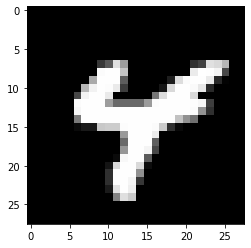

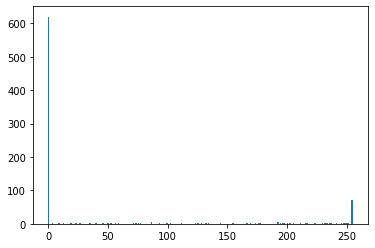

In [ ]:
random_idx = np.random.randint(X.shape[0])
hist = np.histogram(X[random_idx], bins=255)[0];
plt.imshow(X[random_idx].reshape(28,28),interpolation="nearest", cmap = plt.cm.Greys_r);
plt.figure();
plt.hist(X[random_idx], bins=255);

we can represent whole images  as hitograms

In [ ]:
d_hist = np.zeros((X.shape[0], 50))
for i in range(X.shape[0]):
    d_hist[i] = np.histogram(X[i], bins=50)[0]
print( d_hist.shape)

(1500, 50)


In [ ]:
s = cross_val_score(GaussianNB(), d_hist, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.235 (+/- 0.02464)


In [ ]:
s = cross_val_score(RandomForestClassifier(), d_hist, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.252 (+/- 0.02166)


## <span style="color:orange">student</span>:
- Why histograms are not a proper representation in this task?

# Usamos un PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel='rbf')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.928 (+/- 0.01408)


We can perform tunning about components

In [ ]:
n_components = range(10,160,10)
means, stds = [], []
for n in n_components:
    print( n,)
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", SVC(kernel= 'poly')) ))
    s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


Text(0.5, 1.0, 'GaussianNB')

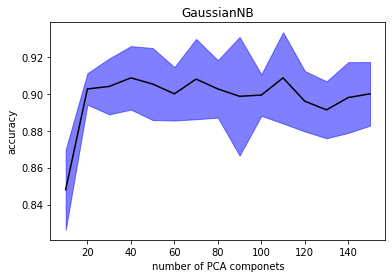

In [ ]:
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("GaussianNB")

In [ ]:
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", RandomForestClassifier()) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.851 (+/- 0.02888)


In [ ]:
n_components = range(10,160,10)
means, stds = [], []
for n in n_components:
    print n,
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", RandomForestClassifier()) ))
    s = cross_val_score(p, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150


Text(0.5, 1.0, 'RandomForestClassifier')

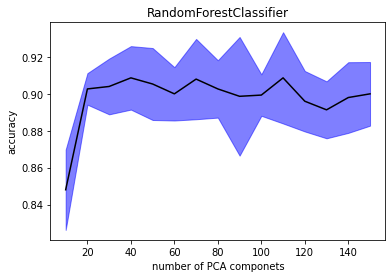

In [ ]:
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")

## <span style="color:orange">student</span>:

- Can we use other image representation?
- What about convolution?

# References

[1] Imagenet: http://www.image-net.org/


[2] Not NMIST: http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html

http://yaroslavvb.com/upload/notMNIST/



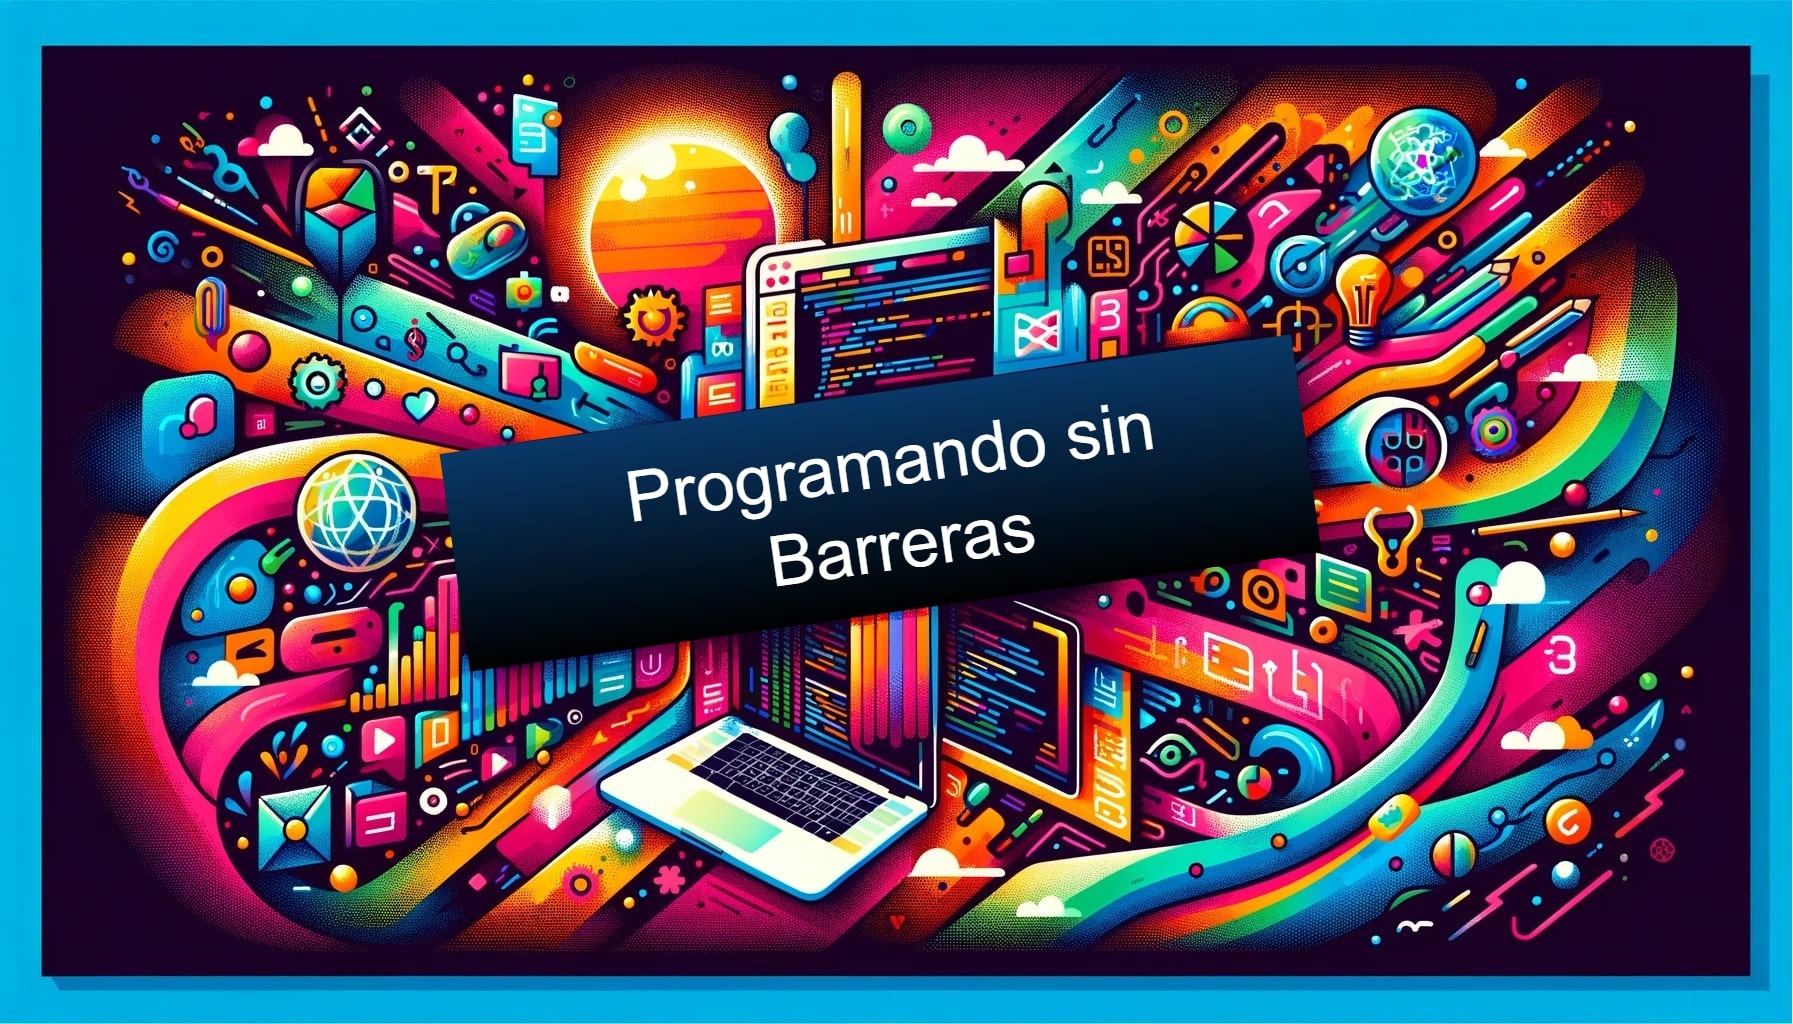